In [55]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as pt

In [3]:
dataset=pd.read_csv("Bengaluru_House_Data.csv")
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
print(dataset.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [6]:
print(dataset.area_type.value_counts())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64


In [7]:
dataset.shape

(13320, 9)

In [8]:
df1=dataset.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:

new_set=df1.dropna()
new_set.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
new_set['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# making a new column
new_set['BHK']=new_set['size'].apply(lambda x:int(x.split(" ")[0]))

C:\Users\Owner\AppData\Local\Temp/ipykernel_14464/4068437514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_set['BHK']=new_set['size'].apply(lambda x:int(x.split(" ")[0]))


In [12]:
new_set.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
# new_set_final=new_set.drop['size']
new_set['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
# queary
new_set[new_set.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
new_set['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def con_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
new_set[~new_set['total_sqft'].apply(con_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
print(new_set.total_sqft.value_counts())

1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: total_sqft, Length: 2067, dtype: int64


In [19]:
# solve the range function
def con_range(x):
    token=x.split("-")
    if(len(token)==2):
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [20]:
print(con_range("2100-2850"))

2475.0


In [21]:
print(con_range("34.46Sq. Meter"))

None


In [22]:
new_set_update=new_set.copy()
new_set_update['total_sqft']=new_set_update['total_sqft'].apply(con_range)
new_set_update.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Enginnering


In [23]:
dataset_new=new_set_update.copy()
dataset_new['price_per']=dataset_new['price']*10000/dataset_new['total_sqft']

In [24]:
dataset_new.head()

,location,size,total_sqft,bath,price,BHK,price_per
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [25]:
dataset_new.location.unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [26]:
len(dataset_new.location.unique())


1304

## technique to reduce categories

In [27]:
dataset_new['location']=dataset_new.location.apply(lambda x:x.strip())
dataset_new.head()

,location,size,total_sqft,bath,price,BHK,price_per
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


### groupby and agrregate the Loaction

In [28]:
loc_status=dataset_new.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [29]:
loc_status

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
loc_less10=loc_status[loc_status<=10]
loc_less10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [31]:
dataset_new.location=dataset_new.location.apply(lambda x:'other' if x in loc_less10 else x)

In [32]:
len(dataset_new.location.unique())

242

In [33]:
dataset_new.head()

,location,size,total_sqft,bath,price,BHK,price_per
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


Relation between BHK and total_sqft

In [35]:
dataset_new[dataset_new.total_sqft/dataset_new.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per
9,other,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,other,3 Bedroom,500.0,3.0,100.0,3,2000.000000


In [37]:
dataset_new.shape

(13246, 7)

Remove some outlier

In [39]:
dataset_new_bhk_remove=dataset_new[~(dataset_new.total_sqft/dataset_new.BHK<300)]
dataset_new_bhk_remove.shape

(12502, 7)

In [40]:
dataset_new_bhk_remove.price_per.describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per, dtype: float64

In [54]:
def remove_priceper_outliers(x):
    x_out=pd.DataFrame()
    for k,s in x.groupby('location'):
        m=np.mean(s.price_per)
        st=np.std(s.price_per)
        reduce_df=s[(s.price_per>(m-st)) & (s.price_per<=(m+st))]
        x_out=pd.concat([x_out,reduce_df],ignore_index=True)
    return x_out
new_update_data=remove_priceper_outliers(dataset_new_bhk_remove)
new_update_data.shape

(10241, 7)

Some Correct visualization 2BHK vs 3BHK

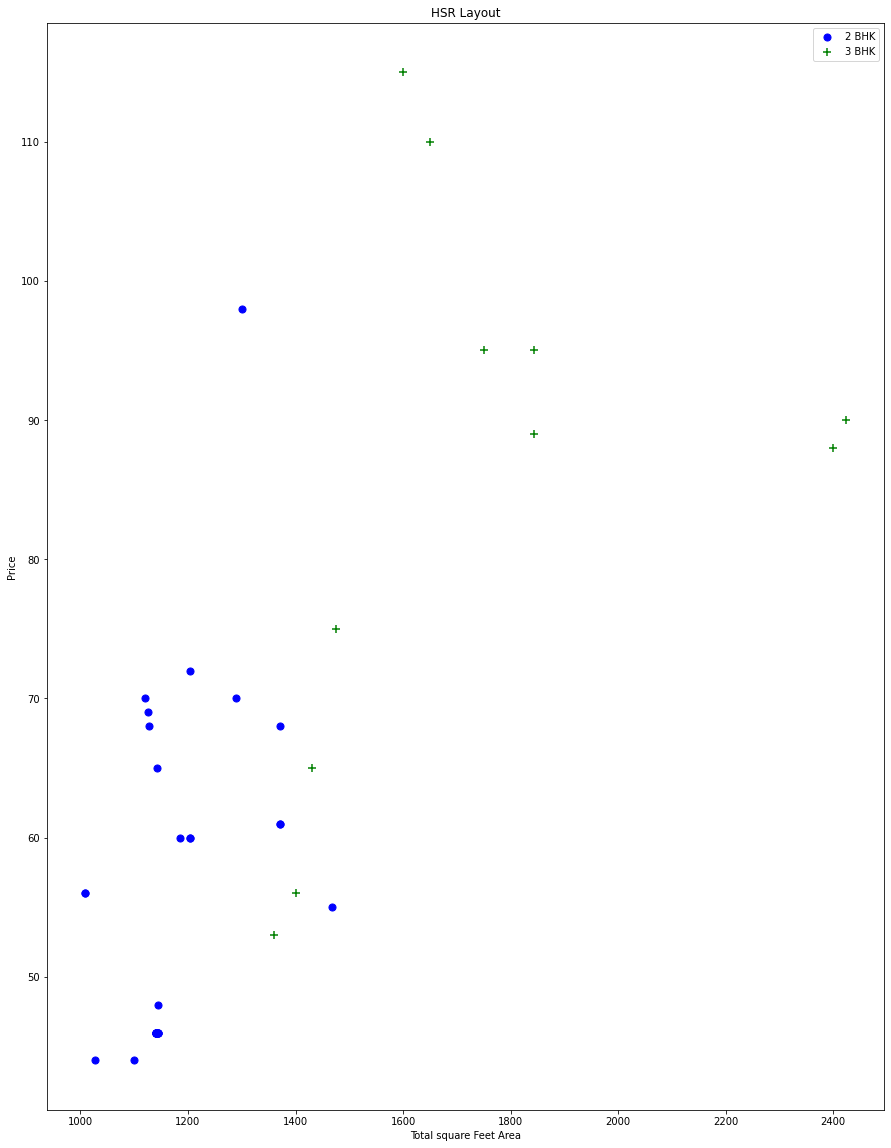

In [62]:
def ploter(df,loc):
    bhk2=df[(df.location==loc) & (df.BHK==2)]
    bhk3=df[(df.location==loc) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,20)
    pt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    pt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    pt.xlabel("Total square Feet Area")
    pt.ylabel("Price")
    pt.title(loc)
    pt.legend()
ploter(new_update_data,'HSR Layout')

In [63]:
# remove price 2bhk>3bhk